## Question: What are the factors contributing to a persons chance of survival in RMS Titanic?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Gathering data
data=pd.read_csv('train.csv') 

# Assessing Data

In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
print('Number of rows: ',data.shape[0],'\nNumber of columns: ',data.shape[1])

Number of rows:  891 
Number of columns:  12


In [9]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Cleaning

##### From initial look on the dataset and the question in mind, It is sure that columns named PassengerId, Name, Ticket will not contribute to our analysis, thus, we should drop those columns

In [16]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [18]:
data.drop(columns=['PassengerId','Name','Ticket',],inplace=True)

In [20]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [24]:
# From the above output, we see that Age, Cabin, and Embarked have missing values. So lets deal with them.
data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

##### Age columns has a large standard deviation from the mean value. That means it's not possible to simply fill the missing values as the mean value. So we will need a work around, that is we will generate a list of random numbers equal to the length of missing values between (mean-std) and (mean+std)

In [29]:
import random
import numpy as np

# Check the number of missing values in the 'Age' column
print('Number of Missing values in Age:', data['Age'].isnull().sum())

# Calculate mean and standard deviation of 'Age'
mean = data['Age'].mean()
std = data['Age'].std()

# Set lower and upper limits and convert them to integers
lower_limit = int(round(mean - std, 0))
upper_limit = int(round(mean + std, 0))

# Generate random integers within the specified limits
random_list = []
for i in range(0, 177):  # Assuming 177 is the number of missing values
    random_list.append(random.randint(lower_limit, upper_limit))

# Convert the list to a numpy array
random_list = np.array(random_list)

# Get the 'Age' column values
age = data['Age'].values

# Fill missing 'Age' values with generated random numbers
k = 0
for i, j in enumerate(age):
    if np.isnan(age[i]):  # Check if 'Age' is NaN
        age[i] = random_list[k]
        k += 1

# Update the 'Age' column in the DataFrame
data['Age'] = age

# Check the number of missing values in 'Age' after filling
print('Number of missing values in Age:', data['Age'].isnull().sum())


Number of Missing values in Age: 177
Number of missing values in Age: 0


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


##### Now Age column has been dealt with, moving on to Cabin column.  

In [33]:
print(data['Cabin'].describe())
print('Number of missing values in Cabin column: ',data['Cabin'].isnull().sum())

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object
Number of missing values in Cabin column:  687


##### Cabin column has a large number of missing values, and it doesn't seem important for our analysis. So we will just drop it

In [35]:
data.drop(columns=['Cabin'],inplace=True)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


##### Moving on to Embarked column

In [40]:
print(data['Embarked'].describe())
print('Missing values: ',data['Embarked'].isnull().sum())

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object
Missing values:  2


##### Embarked column has just 2 missing values, so we will simply fill it up with the most common value, that is 'S'

In [43]:
data['Embarked'].fillna('S',inplace=True)

C:\Users\rajib\AppData\Local\Temp\ipykernel_16768\1306493021.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Embarked'].fillna('S',inplace=True)


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


##### Now that our Data has no missing values, we can move on to Exploring the Data.

# Exploring Data

##### For simplicities sake, we will update Pclass column to contain strings for better visualisation.

In [50]:
data['Pclass']=data['Pclass'].astype('object')
data['Pclass'].replace({1:'Upper Class',2:'Middle Class',3:'Lower Class'},inplace=True)

C:\Users\rajib\AppData\Local\Temp\ipykernel_16768\4020222853.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Pclass'].replace({1:'Upper Class',2:'Middle Class',3:'Lower Class'},inplace=True)


In [52]:
#Adding a new column 's' to store survived status as a string for better visualisations
data['s']=''
data.loc[(data['Survived']==1),'s'] = 'Survived'
data.loc[(data['Survived']==0),'s'] = 'Not Survived'

In [113]:
# Seeing the correlation in the data
###print(data.corr())

#### Q) Number of people on the basis of gender, and class onboard the titanic.

In [60]:
print(data.groupby('Sex')['Survived'].count())
print('\n\n',data.groupby('Pclass')['Survived'].count())

Sex
female    314
male      577
Name: Survived, dtype: int64


 Pclass
Lower Class     491
Middle Class    184
Upper Class     216
Name: Survived, dtype: int64


#### Q) Total number of people who survived the titanic in train.csv dataset.

In [63]:
print(data.groupby('s').size())
# 0 = Not Survived
# 1 = Surived

s
Not Survived    549
Survived        342
dtype: int64


<Axes: xlabel='Sex', ylabel='count'>

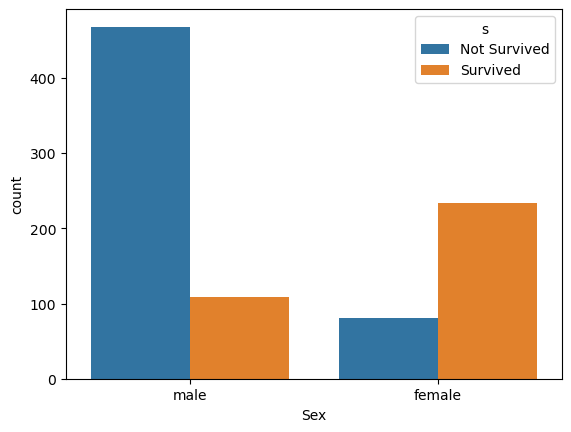

In [65]:
sns.countplot(x='Sex',hue='s',data=data)

#### Out of 891 passengers in the train.csv dataset, only 342 survived in which most were females.

In [68]:
print(data.columns)

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 's'],
      dtype='object')


#### Now, lets try to find out whether class of a person contributed to its likelihood of survival, here class 1 indicates people belonging to upper class of society, class 2 is middle class, and class 3 is lower class.

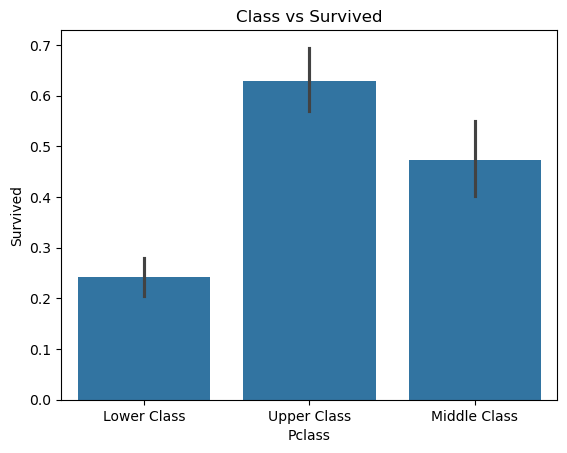

In [71]:
sns.barplot(x='Pclass',y='Survived',data=data)
plt.title('Class vs Survived')
plt.show()

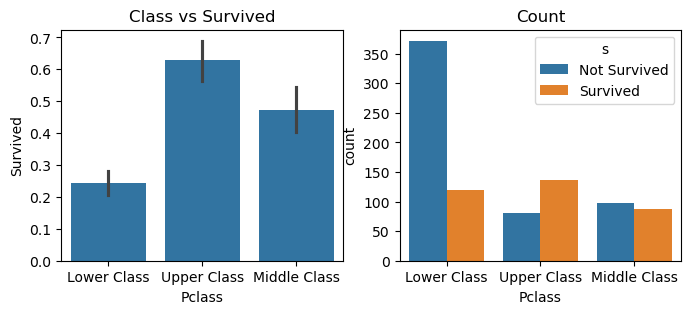

In [73]:
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
sns.barplot(x='Pclass',y='Survived',data=data)
plt.title('Class vs Survived')
plt.subplot(1,2,2)
sns.countplot(x='Pclass',hue='s',data=data)
plt.title('Count')
plt.show()

<Axes: xlabel='Pclass', ylabel='count'>

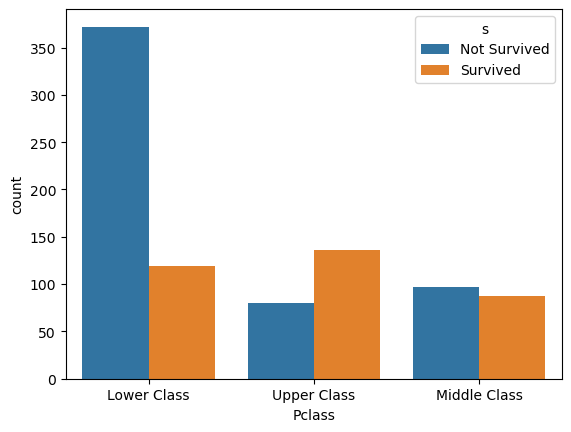

In [75]:
sns.countplot(x='Pclass',hue='s',data=data)

#### By the above graph, we get to know that people belonging to upper class of society survived more than people of middle, and lower classes.  Lets find out the exact number of people who survived on the basis of class

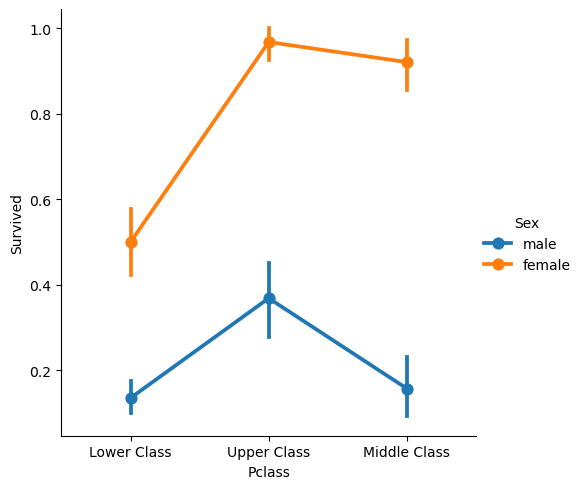

In [78]:
sns.catplot(x='Pclass',y='Survived',hue='Sex',data=data,kind='point')

In [80]:
print(data.groupby(['s','Pclass']).size())
print('\n\n',data.groupby(['Sex','Pclass','s']).size())

s             Pclass      
Not Survived  Lower Class     372
              Middle Class     97
              Upper Class      80
Survived      Lower Class     119
              Middle Class     87
              Upper Class     136
dtype: int64


 Sex     Pclass        s           
female  Lower Class   Not Survived     72
                      Survived         72
        Middle Class  Not Survived      6
                      Survived         70
        Upper Class   Not Survived      3
                      Survived         91
male    Lower Class   Not Survived    300
                      Survived         47
        Middle Class  Not Survived     91
                      Survived         17
        Upper Class   Not Survived     77
                      Survived         45
dtype: int64


#### Thus, from the above data, and the visualisation, we can infer that people belonging to upper class were given more priority during the rescue operation.  
#### 62% of people belonging to upper class survived, whereas only 47% and 24% of people belonging to middle, and lower classes survived the crash.

In [83]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 's'],
      dtype='object')

In [85]:
pd.cut(data['Age'],10).tail()

886    (24.294, 32.252]
887    (16.336, 24.294]
888     (32.252, 40.21]
889    (24.294, 32.252]
890    (24.294, 32.252]
Name: Age, dtype: category
Categories (10, interval[float64, right]): [(0.34, 8.378] < (8.378, 16.336] < (16.336, 24.294] < (24.294, 32.252] ... (48.168, 56.126] < (56.126, 64.084] < (64.084, 72.042] < (72.042, 80.0]]

In [87]:
#data['AgeGrp']=0
#data.loc[(data['Age']<=11),'AgeGrp']=0
#data.loc[(data['Age']>11) & (data['Age']<=22),'AgeGrp']=1
#data.loc[(data['Age']>22) & (data['Age']<=34),'AgeGrp']=2
#data.loc[(data['Age']>34) & (data['Age']<=45),'AgeGrp']=3
#data.loc[(data['Age']>45) & (data['Age']<=57),'AgeGrp']=4
#data.loc[(data['Age']>57) & (data['Age']<=68) ,'AgeGrp']=5
#data.loc[(data['Age']>68) ,'AgeGrp']=6

In [89]:
#data['AgeGrp']=0
#data.loc[(data['Age']<=8),'AgeGrp']=0
#data.loc[(data['Age']>8) & (data['Age']<=16),'AgeGrp']=1
#data.loc[(data['Age']>16) & (data['Age']<=24),'AgeGrp']=2
#data.loc[(data['Age']>24) & (data['Age']<=32),'AgeGrp']=3
#data.loc[(data['Age']>32) & (data['Age']<=40),'AgeGrp']=4
#data.loc[(data['Age']>40) & (data['Age']<=48) ,'AgeGrp']=5
#data.loc[(data['Age']>48) & (data['Age']<=56),'AgeGrp']=6
#data.loc[(data['Age']>56) & (data['Age']<=64),'AgeGrp']=7
#data.loc[(data['Age']>64) & (data['Age']<=72),'AgeGrp']=8
#data.loc[(data['Age']>72) & (data['Age']<=80),'AgeGrp']=9

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\ProgramDa

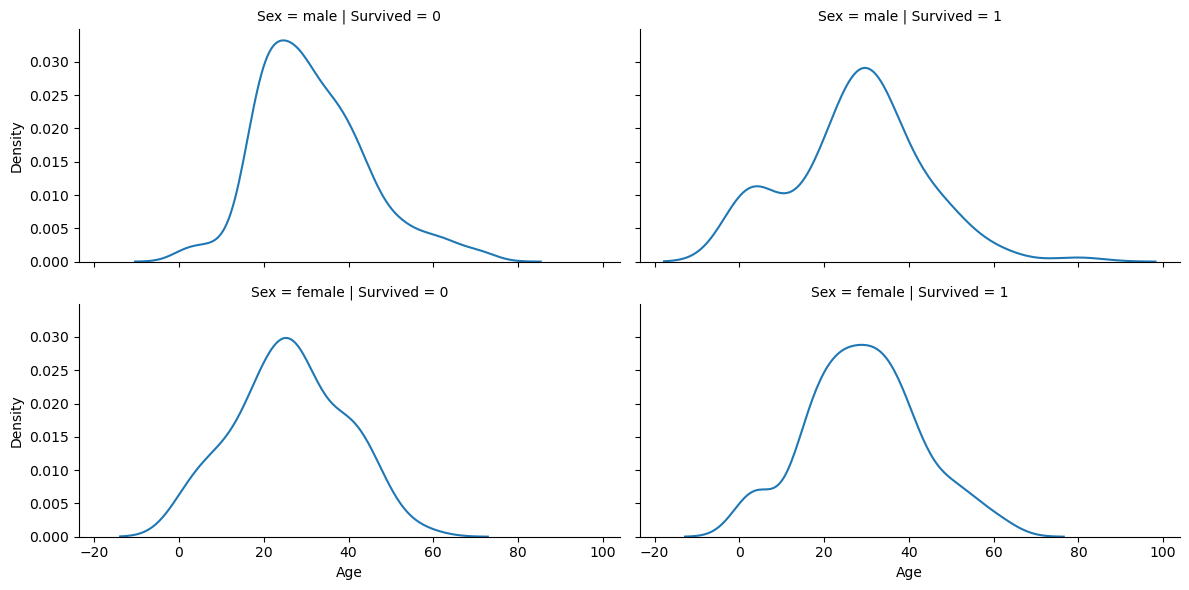

In [91]:
# Probability density function of Age
#plt.figure(figsize=(20,10))
facet=sns.FacetGrid(row='Sex',col='Survived',data=data,aspect=2)
facet.map(sns.distplot,'Age',hist=False)
plt.show()

<Axes: xlabel='Sex', ylabel='count'>

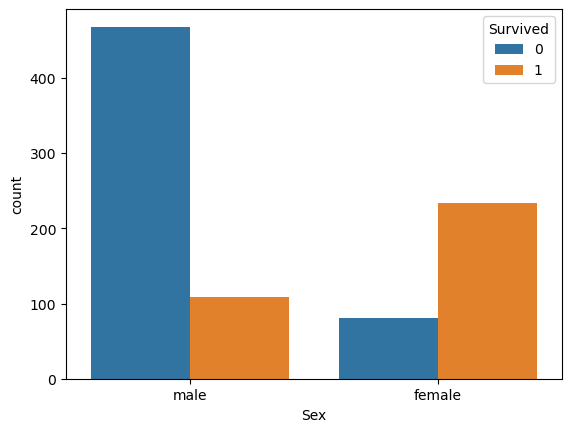

In [93]:
sns.countplot(x='Sex',hue='Survived',data=data)

#### From the above visualisations, we can infer that Infants, and Females were given more priority in the rescue operation.

#### While Men roughly had a higher chance of survival between age of 18 and 50 years old; women, roughly had a higher chance of survival between age of 15 and 50 years old.


In [99]:
#data.corr()

#### Moving on to SibSp and Parch, these two columns signify the number of relatives a person had on titanic, thus it would be better that we make a new column 'Relatives' out of SibSp and Parch.

In [102]:
data['Relatives']=data['SibSp']+data['Parch']

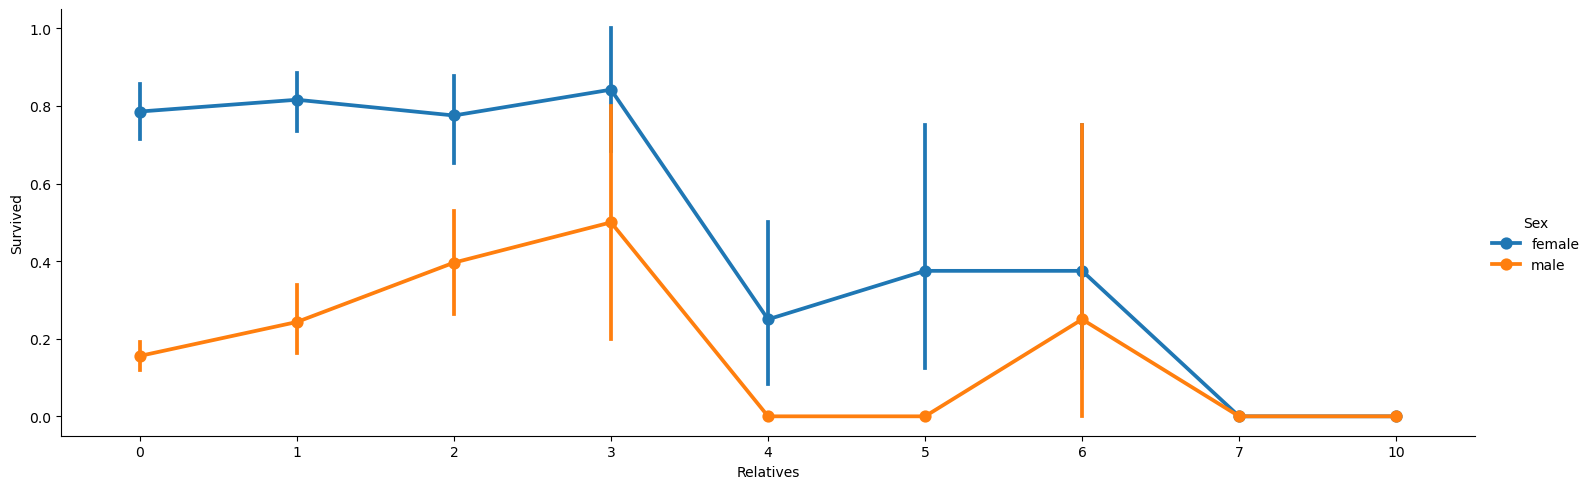

In [106]:
sns.catplot(x='Relatives',y='Survived',data=data,hue='Sex',kind='point',aspect=3)

#### This shows that while there is a higher chance of survival for men between 1 to 3 relatives and lower in the case of having none, or 6 relatives. Women have a higher chance of survival having relaives between 0 to 4

# Conclusion

From the above analysis, we can conclude that a persons likelihood of a chance of survival increases when:  
Sex = Male  
Age = Infants, or between 18 and 50 years old  
Class = Upper or Middle  
Relatives = Between 1 to 3
  
or,  
  
Sex = Female  
Age = Infants, or between 15 and 50 years old  
Class = Any  
Relatives = Between 0 to 4

In [111]:
a=[{'Sex':'Male','Age':'(0,4),(18,50)','Class':'Upper class','Relatives':'1-3'},{'Sex':'Female','Age':'(0,4),(15,50)','Class':'Any class','Relatives':'0-4'}]
df=pd.DataFrame(a)
df[['Sex','Class','Age','Relatives']]

,Sex,Class,Age,Relatives
0,Male,Upper class,"(0,4),(18,50)",1-3
1,Female,Any class,"(0,4),(15,50)",0-4


In [ ]:
####